In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns

sc.set_figure_params(dpi=100, frameon=False, color_map='Reds')
sc.logging.print_header()

/home/yuge/miniconda3/envs/fa_base/lib/python3.8/site-packages/numba/core/cpu.py:78: UserWarning: Numba extension module 'sparse._numba_extension' failed to load due to 'ModuleNotFoundError(No module named 'numba.targets')'.
  numba.core.entrypoints.init_all()
2023-03-06 15:38:17.907560: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-06 15:38:18.121563: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-06 15:38:18.121585: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up 

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.23.3 scipy==1.10.0 pandas==1.5.0 scikit-learn==1.1.2 statsmodels==0.13.2 python-igraph==0.10.3 pynndescent==0.5.7


In [3]:
sc.read('delorey_cryo.h5ad')

AnnData object with n_obs × n_vars = 4366 × 30983
    obs: 'n_genes', 'n_UMI', 'percent_mito', 'method', 'doublet', 'predicted_celltype', 'compartment', 'Viral+', 'original_celltype_ann', 'study', 'subject_ID', 'condition', 'dataset', 'sample'
    var: 'featureid'

In [5]:
sc.read('delorey_fresh.h5ad')

AnnData object with n_obs × n_vars = 2268 × 30983
    obs: 'n_genes', 'n_UMI', 'percent_mito', 'method', 'doublet', 'predicted_celltype', 'compartment', 'Viral+', 'original_celltype_ann', 'study', 'subject_ID', 'condition', 'dataset', 'sample'
    var: 'featureid'

In [8]:
delorey = sc.read('delorey_nuclei.h5ad')
delorey

AnnData object with n_obs × n_vars = 89426 × 30983
    obs: 'n_genes', 'n_UMI', 'percent_mito', 'method', 'doublet', 'predicted_celltype', 'compartment', 'Viral+', 'original_celltype_ann', 'study', 'subject_ID', 'condition', 'dataset', 'sample'
    var: 'featureid'

In [12]:
%%time
sc.pp.normalize_per_cell(delorey, counts_per_cell_after=1e6)
sc.pp.log1p(delorey)
# sc.tl.leiden(delorey, key_added="groups")

In [17]:
delorey = delorey[delorey.obs.compartment == 'epithelial']

In [18]:
sc.pp.pca(delorey)
sc.pp.neighbors(delorey)
sc.tl.umap(delorey)

In [24]:
delorey.obs['Viral+'] = delorey.obs['Viral+'].astype(str)

/home/yuge/miniconda3/envs/fa_base/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yuge/miniconda3/envs/fa_base/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yuge/miniconda3/envs/fa_base/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yuge/miniconda3/envs/fa_base/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/yuge/miniconda3/envs/fa_base/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping

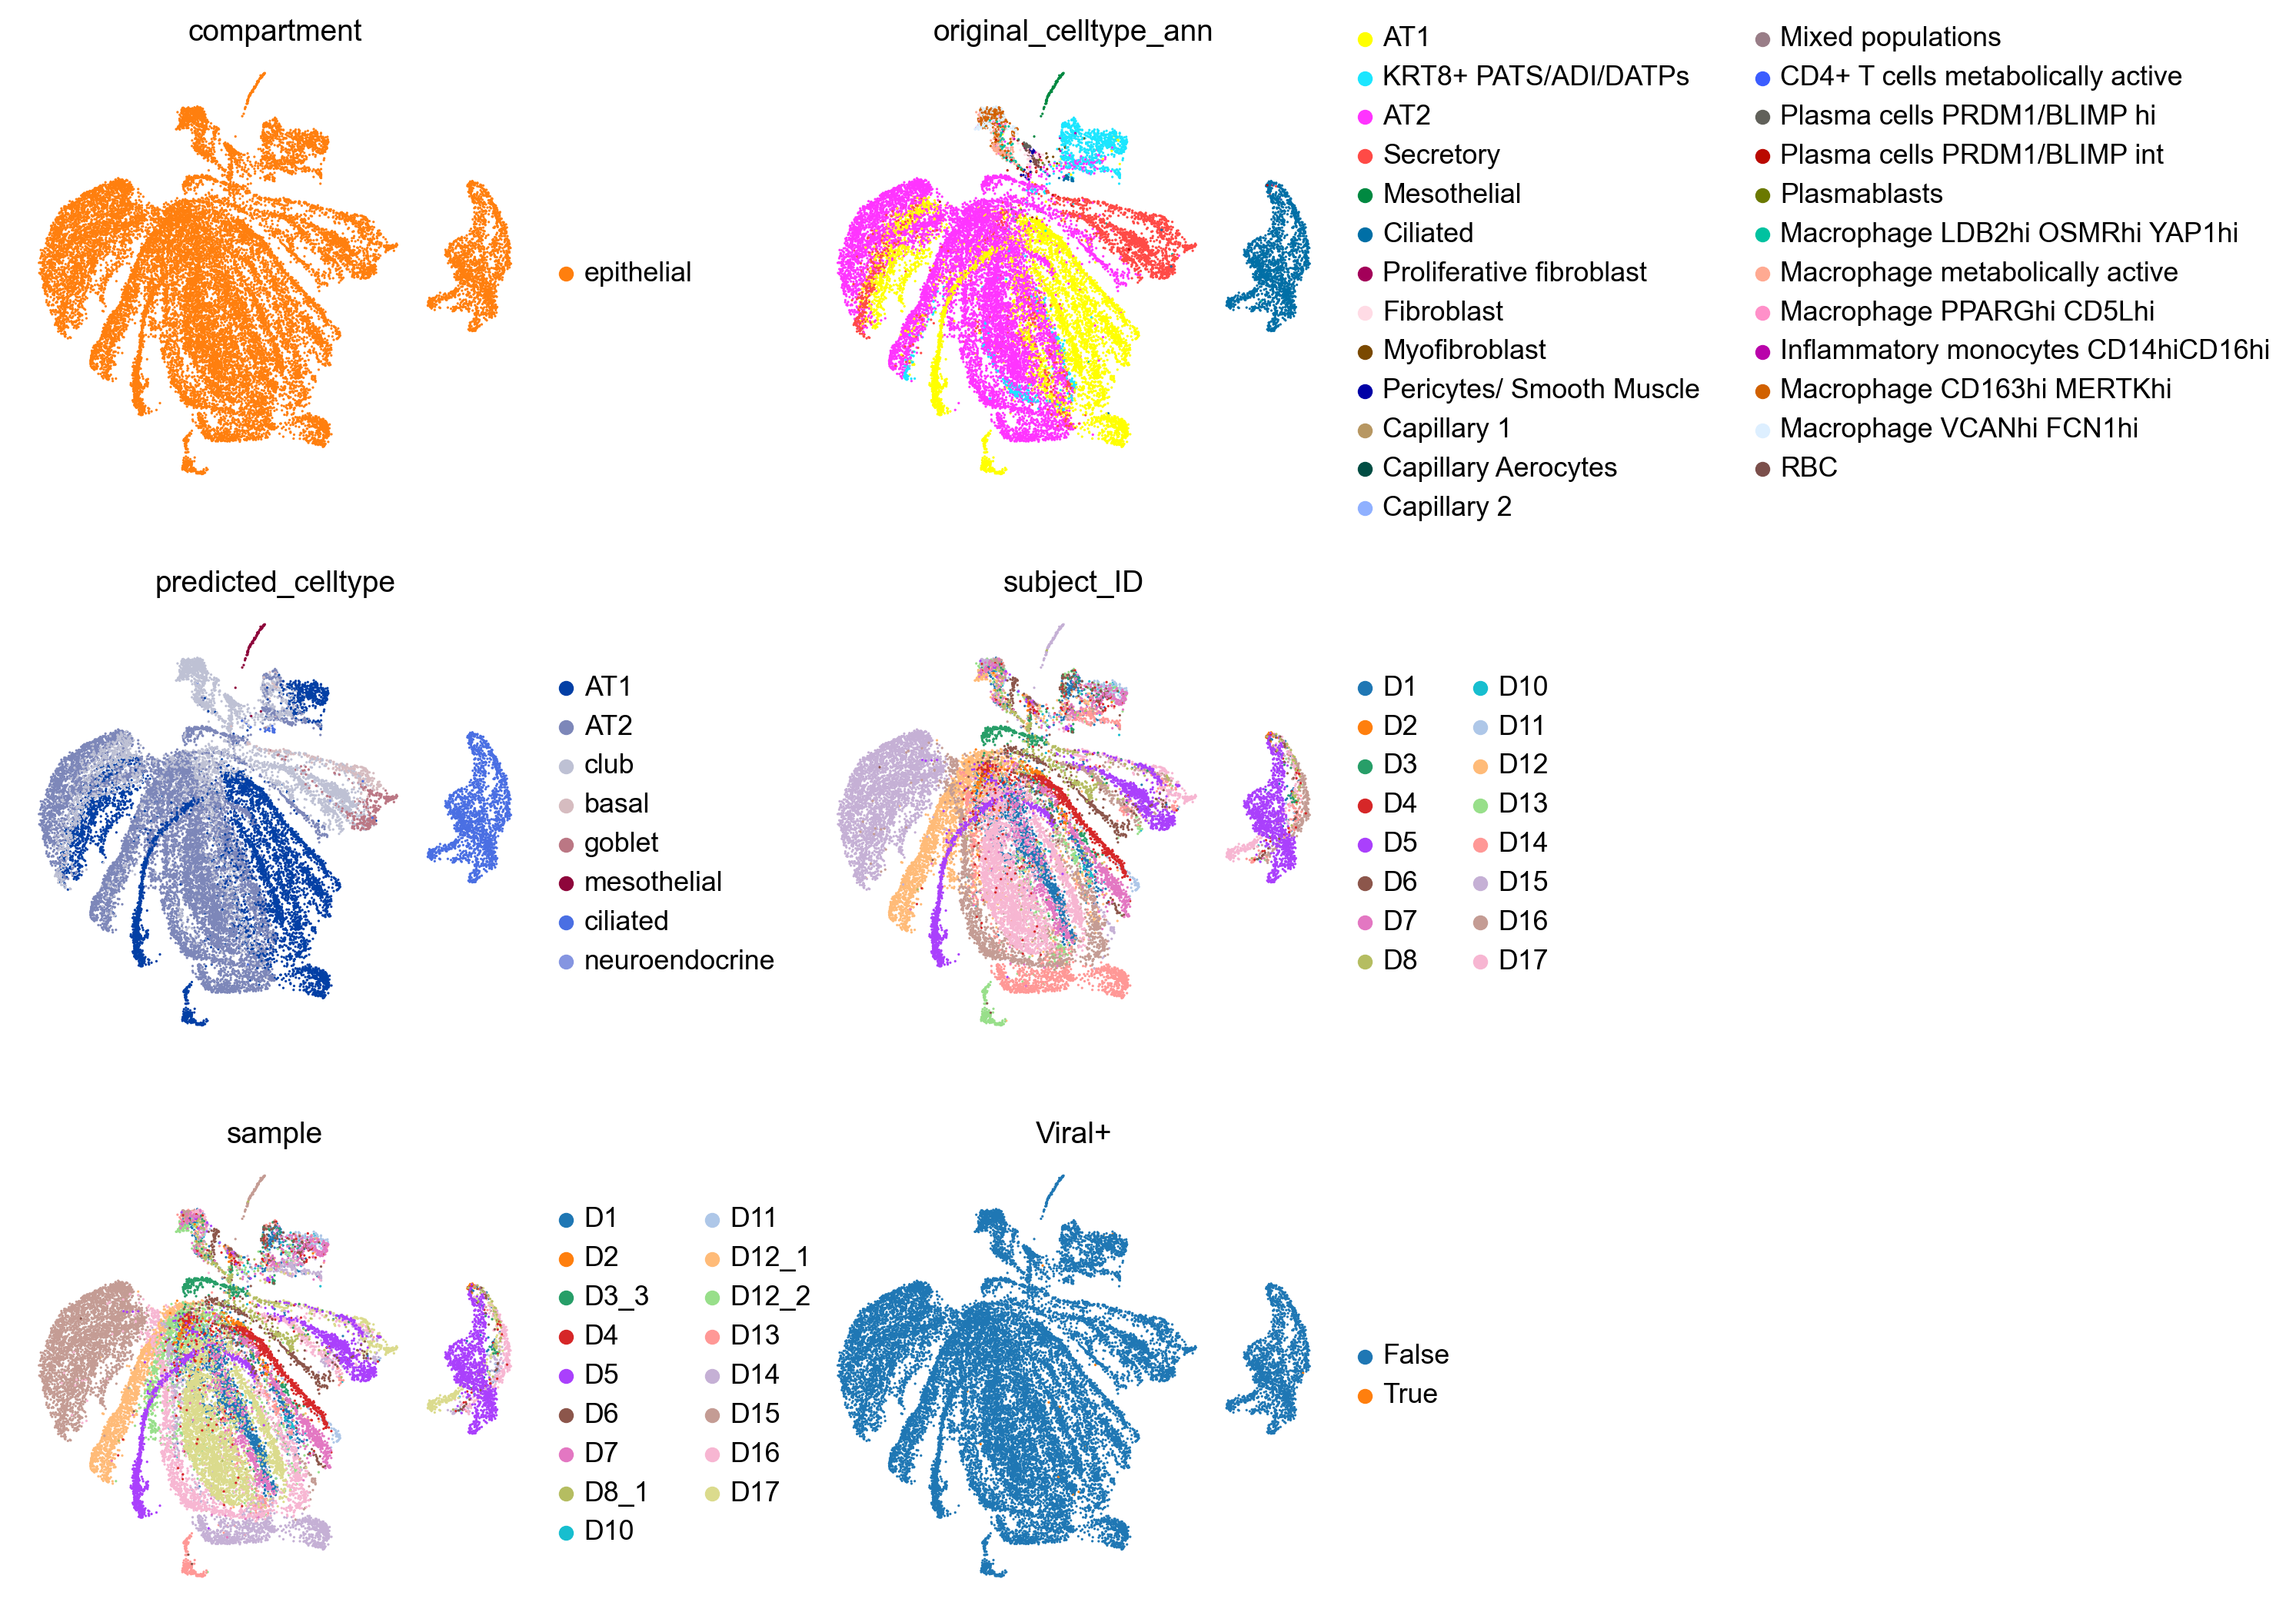

In [25]:
sc.pl.umap(delorey, color=['compartment', 'original_celltype_ann', 'predicted_celltype', 'subject_ID', 'sample', 'Viral+'], wspace=.4, ncols=2)

In [26]:
delorey.write('delorey_sn_processed.h5ad')